In [7]:
#압축파일 풀기
!unzip dogs-vs-cats.zip -d ./data

Archive:  dogs-vs-cats.zip


   skipping: sampleSubmission.csv    need PK compat. v4.5 (can do v2.1)
   skipping: test1.zip               need PK compat. v4.5 (can do v2.1)
   skipping: train.zip               need PK compat. v4.5 (can do v2.1)


In [8]:
import zipfile
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [21]:
import os
os.getcwd()

'c:\\Users\\YJKIM_PC\\pytorch_study\\sesac'

In [22]:
import os
import zipfile

path = 'c:\\Users\\YJKIM_PC\\pytorch_study\\sesac'

data = os.path.join(path, 'data')
train_data = os.path.join(data, 'train')
test_data = os.path.join(data, 'test1')

zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
zip_file.extractall(path=data)
zip_file.close()

zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
zip_file.extractall(path=data)
zip_file.close()

In [23]:
train_files = os.listdir(train_data)
test_files = os.listdir(test_data)

print(len(train_files))
print(len(test_files))

25000
12500


In [24]:
train_files[0]

'cat.0.jpg'

In [25]:
test_files[0]

'1.jpg'

In [26]:
number_of_dogs = 0
number_of_cats = 0

for i in range(len(train_files)):
    if train_files[i].split('.')[0] == 'dog':
        number_of_dogs += 1
    else:
        number_of_cats += 1

print(number_of_dogs)
print(number_of_cats)

12500
12500


In [78]:
#이미지 분류 레이블을 만드는 방법
#방법 1은 폴더로 클래스를 나누는 방법: 폴더명을 레이블로 사용하는 방법
#방법 2는 csv 파일을 만든다. csv 파일의 컬럼 2개 (column 1: 파일명, column 2: 레이블)

#방법 1 사용
#연습시에는 데이터 4000장만 사용(고양이 2000장, 강아지 2000장)
#train: 1000장, 1000장, valid: 500장, 500장, test: 500장, 500장

In [27]:
import os
os.getcwd()

'c:\\Users\\YJKIM_PC\\pytorch_study\\sesac'

In [30]:
import os
import shutil

train_all = os.path.join(os.getcwd(), 'data\\train')
train_dog = os.path.join(os.getcwd(), 'data\\train\\dog')
train_cat = os.path.join(os.getcwd(), 'data\\train\\cat')

train_list = os.listdir(train_all)
print(train_list)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [31]:
os.makedirs(train_dog, exist_ok=True)
os.makedirs(train_cat, exist_ok=True)

In [32]:
for i in train_list:
    if i.split('.')[0] == 'dog':
        shutil.copy(os.path.join(train_all, i), train_dog)
    elif i.split('.')[0] == 'cat':
        shutil.copy(os.path.join(train_all, i), train_cat)

In [34]:
test_all = os.path.join(os.getcwd(), 'data\\test1')

print(len(os.listdir(train_dog)))
print(len(os.listdir(train_cat)))
print(len(os.listdir(test_all)))

12500
12500
12500


## 여기서부터 책 복습한 다음에 다시 시도해볼 것. 검증 데이터셋 분리

In [84]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, files, root_dir, mode='train', transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        #레이블 생성: dog = 0, cat = 1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array([self.label])
        else:
            return img, self.files[idx]

In [85]:
from torchvision import transforms

org_size = (256,256)
img_size = 224

train_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    #평균이 0.5, 표준편차 0.5 (0~1 사이의 실수)
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

In [86]:
#파일 목록, 파일 디렉터리, 모드, transform
train_dog_dataset = CustomDataset(train_dog, os.path.join(train_dir, 'dog'), 'train', transform=train_transform)
train_cat_dataset = CustomDataset(train_cat, os.path.join(train_dir, 'cat'), 'train', transform=train_transform)

valid_dog_dataset = CustomDataset(valid_dog, os.path.join(valid_dir, 'dog'), 'train', transform=test_transform)
valid_cat_dataset = CustomDataset(valid_cat, os.path.join(valid_dir, 'cat'), 'train', transform=test_transform)

#test_dog_dataset = CustomDataset(test_dog, os.path.join(test_dir), 'test', transform=test_transform)
#test_cat_dataset = CustomDataset(test_cat, os.path.join(test_dir), 'test', transform=test_transform)

In [87]:
from torch.utils.data import ConcatDataset

train_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = ConcatDataset([valid_dog_dataset, valid_cat_dataset])
#test_dataset = ConcatDataset([test_dog_dataset, test_cat_dataset])

In [88]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

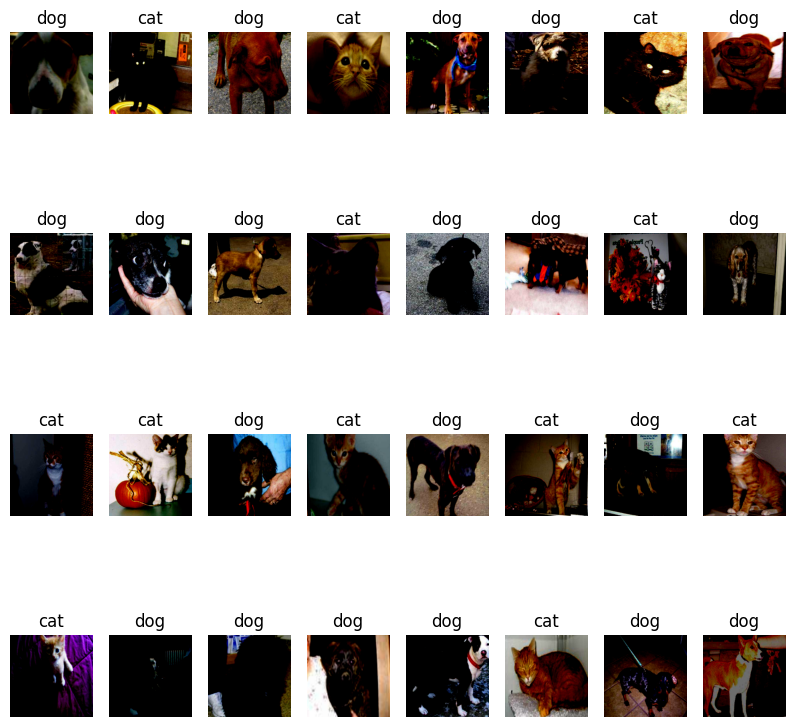

In [89]:
import matplotlib.pyplot as plt

img, label = next(iter(train_loader))
img.shape, label.shape

fig = plt.figure(figsize=(10,10))

classes = {0:'cat', 1:'dog'}

for i in range(32):
    #4행 8열
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_title(classes[label[i].item()])
    ax.axis('off')
    #permute는 color 채널 순서를 재정렬
    ax.imshow(img[i].permute(1,2,0))

plt.show()

In [90]:
import torch
from torchvision.models import resnet50

#imageNet에 사전학습된 모델을 가져와서 학습(train)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = resnet50(pretrained=True).to(device)

In [91]:
!pip install torchsummary

In [92]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [93]:
#특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
#fc -> 분류기, in_features -> 분류기의 입력
model = resnet50(pretrained=True).to(device)
num_features = model.fc.in_features

#이진 분류(binary classifier)
#최종 출력 노드의 개수: 1개(0.2, 0의 클래스일 확률이 더 높은 것)(0.5 기준)
#sigmoid()

#다중 분류(multi-label classifier)
#최종 출력 노드의 개수: 2개([0.8,0.2], [0.3,0.7])
#sofrmax()

#분류기는 2개로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 1),
    torch.nn.Sigmoid()
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [94]:
import time

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    #훈련 모드
    # model.train()

    train_loss = 0
    train_acc = 0
    train_correct = 0

    #그래프로 출력하기 위한 리스트
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()
        #1 epoch 중에 train에 해당하는 for문
        for train_x, train_y in train_loader:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            #활성화 함수 sigmoid를 쓰면
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            #train_y와 y_pred이 같으면 correct 개수 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0
        #1 epoch 중에 valid에 해당하는 for문
        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()

            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        train_loss = 0
        train_acc = 0
        train_correct = 0

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

37.574sec : [Epoch 1/15] -> train loss: 0.4787, train acc: 91.950% / valid loss: 0.2610, valid acc: 98.500%
34.458sec : [Epoch 2/15] -> train loss: 0.1592, train acc: 98.300% / valid loss: 0.1010, valid acc: 99.100%
34.863sec : [Epoch 3/15] -> train loss: 0.0620, train acc: 99.450% / valid loss: 0.0631, valid acc: 99.400%
33.677sec : [Epoch 4/15] -> train loss: 0.0306, train acc: 99.700% / valid loss: 0.0442, valid acc: 99.200%
33.935sec : [Epoch 5/15] -> train loss: 0.0256, train acc: 99.600% / valid loss: 0.0348, valid acc: 99.200%
33.954sec : [Epoch 6/15] -> train loss: 0.0143, train acc: 100.000% / valid loss: 0.0397, valid acc: 99.400%
34.297sec : [Epoch 7/15] -> train loss: 0.0106, train acc: 99.900% / valid loss: 0.0271, valid acc: 99.100%
33.339sec : [Epoch 8/15] -> train loss: 0.0079, train acc: 100.000% / valid loss: 0.0286, valid acc: 99.200%
33.776sec : [Epoch 9/15] -> train loss: 0.0064, train acc: 100.000% / valid loss: 0.0248, valid acc: 99.400%
33.814sec : [Epoch 10/15]

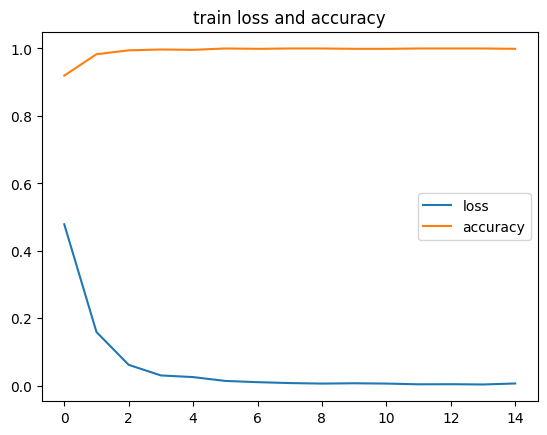

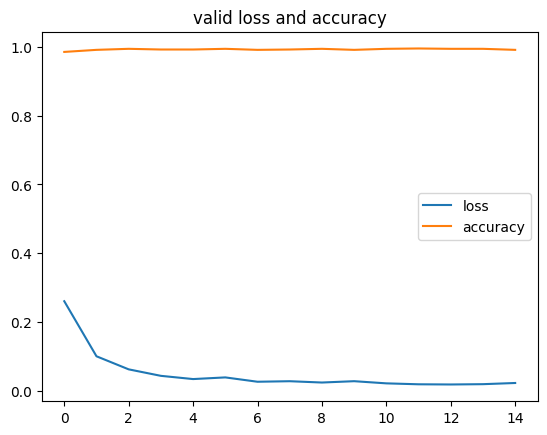

In [95]:
learning_rate = 0.00001
epochs = 15
#손실 함수 정의
#신경망에 sigmoid를 썼으므로 BCELoss() 사용
#만약 신경망에 softmax를 썼다면 CELoss() 사용
criterion = torch.nn.BCELoss().to(device)
#optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#학습
fit(model, criterion, optimizer, epochs, train_loader, valid_loader)